In [ ]:
!pip install "qiskit==0.46.0" "qiskit-aer==0.13.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have nump

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

print("✅ Qiskit importato correttamente!")

✅ Qiskit importato correttamente!



=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISULTATO FINALE ===
Best solution: [1, 0, 0, 1]
Best fitness : 0.954
Iterations   : 62
Converged: True


=== RISUL

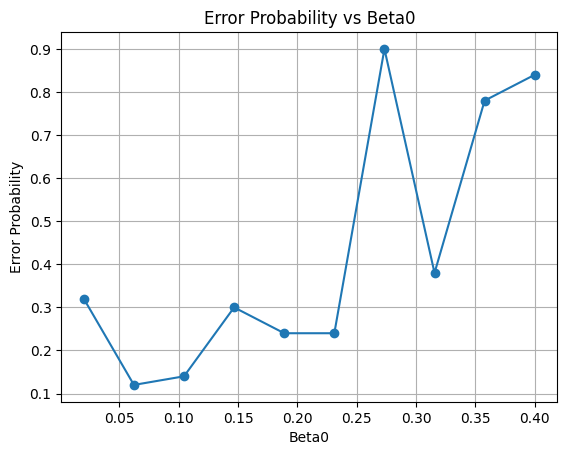

In [ ]:
from pickle import NONE
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from math import pi, asin, sqrt, cos, sin
from collections import defaultdict

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from numpy import pi

# Parametri QACO
#rho = 0.1                # Evaporazione del feromone, non serve
#beta_e0 = 0.13             # Probabilità esplorazione iniziale
maxIter = 62              # Numero massimo di iterazioni
converCondition = 59      # Condizione di convergenza
n = 4                     # Dimensione matrice M, il codice è comunque generalizzato nella funzione update_thetas
Converged_by_theta=False

rule_counter = defaultdict(int)


# Matrice M del problema


M = np.array([[0.430, -0.496, -0.443, 0.223],
              [0, 0.254, 0.029, -0.359],
              [0, 0, -0.424, -0.183],
              [0, 0, 0, 0.301]])

true_solution = [1, 0, 0, 1]

# # Visualizzazione della matrice M
# print("Matrice M del problema:")
# print(M)

# -------------------------
# Lookup table (Table 1) and delta rule
# -------------------------
# Values given in Table 1 (multiples of pi). We'll store numeric values directly.
_lookup_table = {
    (0,0,True): -0.01 * pi,
    (0,0,False): 0.04 * pi,
    (0,1,True): -0.05 * pi,
    (0,1,False): 0.07 * pi,
    (1,0,True): 0.05 * pi,
    (1,0,False): -0.07 * pi,
    (1,1,True): 0.01 * pi,
    (1,1,False): -0.04 * pi             ## the condition of cos<0 is implemented later on
}


def init_pheromones(theta_ant):
    """Initialize RY angles θ_i = π/2 for all ant qubits."""
    theta_ant=[pi/2]*n #n = 4
    return theta_ant

def exploration_angle(beta_e):
    """Compute θ_e = 2 * arcsin(√β_e)."""
    return 2.0 * asin(sqrt(beta_e))

def calculate_fitness(X, M):
    X = np.array(X, dtype=float)
    return float(X @ M @ X.T)


def quantum_iteration_circuit_qiskit(theta_ant, theta_e, backend_shots=1024, seed=None):

    #Creazione circuito quantistico
    n_local = len(theta_ant)  #4
    qc = QuantumCircuit(n_local + 1, n_local)   #1 control QUBIT (EXPLORATION), 4 target QUBIT (ANT)...  ; 5 qubits and 4 classical bits

    # (A) preparazione ant-qubit con RY(theta_i) su qubit 1..n
    for i in range(n_local):
      qc.ry(float(theta_ant[i]), i+1)

    # (B) per ogni ant-qubit: preparazione exploration RY(theta_e), CX(0,i+1), reset(0)---> see the appendix 2 about the reset
    for i in range(n_local):
      qc.ry(float(theta_e), 0)
      qc.cx(0, i+1)
      qc.reset(0)

    # (C) misura ant-qubit 1..n nei bit classici 0..n-1
    for i in range(n_local):
      qc.measure(i+1, i)

        # (D) esecuzione con AerSimulator
    sim = AerSimulator()
    t_qc = transpile(qc, sim)

    # se seed fornito, lo passiamo (seed_simulator è gestito da Aer.run kwargs)
    run_args = {"shots": int(backend_shots)}

    if seed is not None:   #####capire cosa sia il seed
                # seed_simulator e seed_transpiler sono argomenti utili per riproducibilità
        run_args["seed_simulator"] = int(seed)
        run_args["seed_transpiler"] = int(seed)

    job = sim.run(t_qc, **run_args)
    result = job.result()
    counts = result.get_counts()


    # invertiamo per ottenere ordine naturale q0..q_{n-1}

    #Prendi la bitstring più frequente e assicurati che sia stringa normale
    bitstring = max(counts, key=counts.get)
    if isinstance(bitstring, bytes):
        bitstring = bitstring.decode("utf-8")

    # Mantieni solo 0/1 e inverti (Qiskit restituisce l’ordine inverso dei qubit)
    bitstring = ''.join(ch for ch in bitstring if ch in ('0', '1'))
    measured_bits = [int(b) for b in bitstring[::-1]]

    # print("Bitstring misurata:", bitstring, "→", measured_bits)
    # print("Counts del circuito quantistico:   \n ", counts,"\n")
    #print(qc.draw())
    return measured_bits, counts



def lookup_delta_theta(xi, bi, is_current_better, theta_ant):
    """
    xi: bit misurato per qubit ANT i (0 o 1)
    bi: bit nella soluzione di riferimento b (0 o 1)
    is_current_better: True se f(x) > f(b), altrimenti False
    theta_i: angolo corrente del qubit ANT i

    Restituisce Δθ da sommare a θ_i.
    Applica la regola: se la riga “is_current_better == True” e cos(theta_i/2) < 0,
    inverte il segno di base. (come riportato nel paper)
    """
    key = (int(xi), int(bi), bool(is_current_better))
    base = _lookup_table[key]
    # righe “miglioramento” (is_current_better == True) sono soggette all’inversione
    if is_current_better and math.cos(theta_ant / 2) < 0:
        return -base
    return base

def update_thetas(theta_ant, measured_bits, best_bits, f_x, f_b, rule_counter):
    """
    Aggiorna in-place una lista di angoli theta_list per tutti i qubit i = 0..n-1.

    Parametri:
      - theta_ant: lista di valori θ_i correnti (float ANT qubit)
      - measured_bits: la soluzione misurata x come lista di 0/1
      - best_bits: la soluzione di confronto b (lista di 0/1), potrebbe essere None
      - f_x: fitness di x
      - f_b: fitness di b (se b è None, f_b può essere considerato -∞)

    Ritorna la nuova lista theta_ant aggiornata (o aggiorna in-place).
    """
    n = len(theta_ant)

    # Se best_bits è None (prima iterazione), definiamo bi = 0 per default

    for i in range(n):
        xi = measured_bits[i]
        bi = 0 if best_bits is None else best_bits[i]
        is_current_better = (f_x > f_b)
        # Conta la combinazione


        rule_counter[(xi, bi, is_current_better)] += 1

        delta = lookup_delta_theta(xi, bi, is_current_better, theta_ant[i])
        theta_new = theta_ant[i] + delta

        # Clip θ_i nell’intervallo [0, π]
        if theta_new < 0.0:
            theta_new = 0.0
        if theta_new > math.pi:
            theta_new = math.pi

        theta_ant[i] = theta_new


    global Converged_by_theta
    tol = 1e-5  # tolleranza numerica

    if all(
        np.isclose(t, 0, atol=tol) or
        np.isclose(t, np.pi, atol=tol)
        for t in theta_ant
    ):
        Converged_by_theta = True

    return theta_ant, Converged_by_theta


def qaco_run_main(M, beta_e0=0.13, seed=None, backend_shots=1024, verbose=False): ##############################################
    """
    Implementazione principale di QACO (Alg.2) per il caso unconstrained.
    Usa le funzioni:
        - quantum_iteration_circuit_qiskit(...)   # per costruire ed eseguire il circuito
        - update_thetas(...)                      # per aggiornare i theta (feromone)
    """
    rng = np.random.default_rng(seed)
    n = M.shape[0]
    theta_ant=[0]*n
    best_bits=[0]*n
    # ---------------------------
    # Parametri iniziali
    # ---------------------------
    # θ_i iniziali = π/2

    theta_ant = init_pheromones(theta_ant)
    best_solution = None
    best_fitness = -np.inf

    # print(f"--- QACO run (n={n}) ---")
    # print(f"converCondition = {converCondition}, maxIter = {maxIter}\n")

    # ---------------------------
    # Loop principale
    # ---------------------------


    global Converged_by_theta # Accedi alla variabile globale
    Converged_by_theta = False # Reset della condizione di convergenza dei theta all'inizio di ogni run
    rule_counter = defaultdict(int)

    for iter_num in range(1, maxIter + 1):
        # print(f"Iter {iter_num:3d} \n")

        # (1) Aggiorna beta_e e theta_e
        beta_e = beta_e0 + (1.0 - beta_e0) * (iter_num / maxIter)
        theta_e=exploration_angle(beta_e)

        # (2) Memorizza la best precedente
        f_prev_best = -np.inf if best_bits is None else calculate_fitness(best_bits, M)

        # (3) Esegui il circuito quantistico (singolo shot)
        measured_bits, counts = quantum_iteration_circuit_qiskit(theta_ant, theta_e, backend_shots=backend_shots, seed=seed)

        # (4) Calcola la fitness
        fitness=calculate_fitness(measured_bits, M)

        # (5) Aggiorna i θ_i con la lookup table
        theta_ant, Converged_by_theta = update_thetas(theta_ant, measured_bits, best_bits, fitness, f_prev_best, rule_counter)


         # (6) Aggiorna best se necessario
        if fitness > best_fitness:
            best_fitness = fitness
            best_bits = measured_bits.copy()
            conver_counter = 0
        else:
            conver_counter += 1
        # (7) Stampa risultati
        if verbose:
            print(f"measured final bit={measured_bits} "
                  f"f_x={fitness:.5f} | best_f={best_fitness:.5f} "
                  f"conv={conver_counter}/{converCondition} ")
            if Converged_by_theta:
                print(" (Convergenza per theta raggiunta!)\n ")
            else:
                print("\n")

        # (8) Condizione di convergenza
        if conver_counter >= converCondition:
            print("\n🟢 Convergenza raggiunta per condizione standard!")
            break
        # Nuova condizione di convergenza basata su theta_ant
        # if Converged_by_theta:
        #     print("\n🟢 Convergenza raggiunta: tutti i theta sono 0 o pi/2!")
        #     break

    # ---------------------------
    # Risultato finale
    # ---------------------------
    print("\n=== RISULTATO FINALE ===")
    print("Best solution:", best_bits)
    print("Best fitness :", best_fitness)
    print("Iterations   :", iter_num)
    if conver_counter < converCondition and not Converged_by_theta:
       print("NOT CONVERGED")
    else:
        print("Converged: True") # Aggiunto per chiarezza sul perché si è fermato
    print("=========================\n")

    return rule_counter, best_bits #{
        # 'best_solution': best_bits,
        # 'best_fitness': best_fitness,
        # 'iterations': iter_num,
        # 'converged': conver_counter >= converCondition or Converged_by_theta
    #}


def analyze_beta_range(M, beta_list,true_solution, runs_per_beta):

    labels = [
        (0,0,False), (0,0,True),
        (0,1,False), (0,1,True),
        (1,0,False), (1,0,True),
        (1,1,False), (1,1,True)
    ]

    label_names = {
        (0,0,False): "00F",
        (0,0,True):  "00T",
        (0,1,False): "01F",
        (0,1,True):  "01T",
        (1,0,False): "10F",
        (1,0,True):  "10T",
        (1,1,False): "11F",
        (1,1,True):  "11T",
    }

    error_rates = []

    for beta0 in beta_list:
        error_count = 0

        true_solution = list(true_solution)

        aggregate_counter = defaultdict(int)

        for run in range(runs_per_beta):
            rule_counter,found_solution = qaco_run_main(
                M,
                beta_e0=beta0,
                seed=run,          # seed diverso per stabilità statistica
                verbose=False
            )
            if list(found_solution) != true_solution:
               error_count += 1



            for k, v in rule_counter.items():
                aggregate_counter[k] += v

        error_rate = error_count / runs_per_beta
        error_rates.append(error_rate)

        total_updates = sum(aggregate_counter.values())

        print("\n====================================")
        print(f"Beta0 = {beta0}")
        print(f"Errors: {error_count}")
        print(f"Error rate: {error_rate:.4f}")
        print("====================================")

        for label in labels:
            ratio = aggregate_counter[label] / total_updates if total_updates > 0 else 0
            print(f"{label_names[label]:4s}  {ratio:.4f}")


        print("Total updates:", total_updates)

    return error_rates


beta_values = np.linspace(0.02, 0.4, 10)

error_rates=analyze_beta_range(M, beta_values, true_solution, runs_per_beta=50)



plt.figure()
plt.plot(beta_values, error_rates, marker='o')
plt.xlabel("Beta0")
plt.ylabel("Error Probability")
plt.title("Error Probability vs Beta0")
plt.grid(True)
plt.show()